# UC San Diego: Data Science in Practice
## Final Project Title (change this to your project's title)

## Permissions

Place an `X` in the appropriate bracket below to specify if you would like your group's project to be made available to the public. (Note that student names will be included (but PIDs will be scraped from any groups who include their PIDs).

* [  ] YES - make available
* [X] NO - keep private

# Names

- Zhirui Xia
- Zehan Li
- Yue Yin
- Xiaojie Chen
- Chenri Luo


# Overview

* Write a clear, 3-4 sentence summary of what you did and why.

<a id='research_question'></a>
# Research Question

Do `Genre`, `Price`, and `Update Frequency` have a statistically significant influence, individually and together, on the `Version Score` of an app? Can these variables be used to predict the version score of an app?

<a id='background'></a>

## Background & Prior Work

Mobile applications have become an essential part of daily life, catering to various user needs ranging from entertainment to productivity. Both the genre and the content rating of an app are crucial attributes that can determine its reception among users, which can be measured by the number of reviews and user ratings it receives[^Khalid2015].

There have been several studies analyzing aspects of mobile applications and their performance in the market. In a study by Mo et al. (2017), they examined the relationship between the number of downloads, ratings, and the category of Android apps. They discovered that different app categories had varied ratings, and this variance significantly influenced the number of download[^Mo2017].

In a different study, Fu et al. (2013) analyzed the impact of age ratings on the success of iOS games, and they found that games rated for older age groups had fewer downloads but higher revenues[^Fu2013]. While these studies have looked at genre or content rating separately, our research will extend this line of inquiry by investigating how these two factors together influence an app's reviews and ratings.

Other relevant research includes a study by Khalid et al. (2015), where they investigated the common reasons behind negative app reviews. They found that bugs, app functionality, and customer service were significant factors that led to lower ratings[^Khalid2015]. This background could provide valuable context in understanding the dynamics of user reviews and ratings.

[^Khalid2015]: Khalid, H., Shihab, E., Nagappan, M., & Hassan, A. E. (2015). What Do Mobile App Users Complain About? A Study on Free iOS Apps. IEEE Software, 32(3), 70-77.

[^Mo2017]: Mo, K., Tan, C., & Lu, S. (2017). Watch Out for This! A Study of the Factors that Influence Mobile Application Downloads. 2017 13th International Conference on Computational Intelligence and Security (CIS).

[^Fu2013]: Fu, F., Zhang, L., & Chan, K. (2013). A multilevel model of free-to-play games: An empirical study of a game's lifetime and revenue. Expert Systems with Applications, 40(8), 3166-3173.

# Hypothesis


Research Hypothesis: 

There is a significant relationship between the `genre`, `price of the app`, and its `update frequency` (calculated from Released_Date and Updated_Date) of an app, and the `current version score` of the apps in Apple AppStore.

Null hypothesis:

There is no significant relationship between the genre, price, and update frequency of an app, and the Current_Version_Score of the apps in Apple AppStore.

# Dataset(s)

- **Dataset Name**: Apple App Data
- **Link to the dataset**: https://www.kaggle.com/datasets/gauthamp10/apple-appstore-apps
- **Number of observations**: 129465 × 21
- **Description of the dataset**: 

This dataset is about information of applications on Apple AppStore. 

The dataset has **21** columns and **1.2 Million+** App Data but for the purpose of our project, we have shrinked it to **129465 x 21** observations and each row representing a unique app. The columns contain the following information:

This datasets provides valuable insights into **user ratings analysis** and investigating potential correlations to it. By exploring the distribution of average user ratings basing on different other variables, this dataset can help to understand factors that are important in getting high user satisfaction for app developers.

# Ethics & Privacy

In this project, ethics and privacy are critical and is one of our major concerns. The proposed data potentially includes sensitive information such as user reviews and ratings. Biases might arised from the collection of usage of such data, potentially leaking sensitive information or leads to biased result of our project. For example, the app reviews data might exclude certain populations based on the various contents of the app, and the potential customers of each app differ by a large scale, which can lead to the uncomprehensive result and unfair or discriminatory analysis. To prevent such problems, it is important to conduct a thorough review of the dataset before analysis, identify any biases, and take actions to mitigate them. During our analysis, we must remain vigilant for biases and evaluate the impact of any findings on different demographic and different age groups. Afterward, when discussing the analysis, transparency about the dataset's limitations should also be maintained and keep in mind for responsible and ethical approach. Furthermore, in order to be thorough, the misuse of user data for targeted advertising without explicit consent could infrige upon user privacy. In order to handle it, it is necessary to anonymize and aggregfate the data, use dataset from public source that has user consent for data usage, and ensure compliance with any privacy regulations. In summary, ethics and privacy are essential to data scientists. Addressing concerns, mitigating biases, protecting privacy, and complying with ethics are significant during the data collection, analysis, and communication processes. Transparency, fairness, and responsible data handling are important to ensure an unbiased and ethical project.

# Data Wrangling

1. Download the datasets:

   We have pulled our dataset to our group github: https://github.com/drsimpkins-teaching/cogs108_ss1_23_group_13/blob/main/app.csv
   
   The first step is to download and store the csv file in the current working directory. 
<br>

2. Import necessary libraries: 
   
   The first step is to import the required libraries. 
   
   **numpy** and **pandas** libraries are imported using the aliases np and pd, respectively.  
<br>

3. Read the data from the CSV file: 
   
   Using `pd.read_csv()` function from pandas read the data from the CSV file (app.csv) and create a DataFrame. 
   
   **NOTE**: The CSV file (app.csv) should be located in the current working directory.
<br>

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import plotly.express as px

app = pd.read_csv("app.csv")
app.head()

,App_Id,App_Name,AppStore_Url,Primary_Genre,Content_Rating,Size_Bytes,Required_IOS_Version,Released,Updated,Version,...,Currency,Free,DeveloperId,Developer,Developer_Url,Developer_Website,Average_User_Rating,Reviews,Current_Version_Score,Current_Version_Reviews
0,com.hkbu.arc.apaper,A+ Paper Guide,https://apps.apple.com/us/app/a-paper-guide/id...,Education,4+,21993472.0,8.0,2017-09-28T03:02:41Z,2018-12-21T21:30:36Z,1.1.2,...,USD,True,1375410542,HKBU ARC,https://apps.apple.com/us/developer/hkbu-arc/i...,NaN,0.0,0,0.0,0
1,com.dmitriev.abooks,A-Books,https://apps.apple.com/us/app/a-books/id103157...,Book,4+,13135872.0,10.0,2015-08-31T19:31:32Z,2019-07-23T20:31:09Z,1.3,...,USD,True,1031572001,Roman Dmitriev,https://apps.apple.com/us/developer/roman-dmit...,NaN,5.0,1,5.0,1
2,no.terp.abooks,A-books,https://apps.apple.com/us/app/a-books/id145702...,Book,4+,21943296.0,9.0,2021-04-14T07:00:00Z,2021-05-30T21:08:54Z,1.3.1,...,USD,True,1457024163,Terp AS,https://apps.apple.com/us/developer/terp-as/id...,NaN,0.0,0,0.0,0
3,fr.antoinettefleur.Book1,A-F Book #1,https://apps.apple.com/us/app/a-f-book-1/id500...,Book,4+,81851392.0,8.0,2012-02-10T03:40:07Z,2019-10-29T12:40:37Z,1.2,...,USD,False,439568839,i-editeur.com,https://apps.apple.com/us/developer/i-editeur-...,NaN,0.0,0,0.0,0
4,com.imonstersoft.azdictionaryios,A-Z Synonyms Dictionary,https://apps.apple.com/us/app/a-z-synonyms-dic...,Reference,4+,64692224.0,9.0,2020-12-16T08:00:00Z,2020-12-18T21:36:11Z,1.0.1,...,USD,True,656731821,Ngov chiheang,https://apps.apple.com/us/developer/ngov-chihe...,http://imonstersoft.com,0.0,0,0.0,0


# Data Cleaning

#### 1. Removing Rows with No Reviews:

Any row in the DataFrame where the 'Reviews' column has a value less than or equal to zero is removed. This effectively removes apps that have no reviews, which are useless to our analysis.

In [10]:
# Remove useless rows with no reviews
app = app[app['Reviews'] > 0]

#### 2. Dropping Useless Columns:

Columns that are considered irrelevant or redundant for the analysis are dropped from the DataFrame.

In [11]:
# Drop useless columns
app = app.drop(columns=['AppStore_Url','Currency','Developer_Url', 'Developer_Website','Average_User_Rating',
                        'Current_Version_Reviews', 'Required_IOS_Version', 'DeveloperId', 'Developer', 'Developer_Url',
                       'Developer_Website'])

#### 3. Dropping Rows with Null Values:

Any row with at least one missing (NaN) value is dropped from the DataFrame to get rid of missing data.


In [12]:
# Drop rows with null value
app = app.dropna(how='any')
app.head()

,App_Id,App_Name,Primary_Genre,Content_Rating,Size_Bytes,Released,Updated,Version,Price,Free,Reviews,Current_Version_Score
1,com.dmitriev.abooks,A-Books,Book,4+,13135872.0,2015-08-31T19:31:32Z,2019-07-23T20:31:09Z,1.3,0.00,True,1,5.00000
10,com.pitashi.audiojoy.aacompanionfree,AA Audio Companion for Alcoholics Anonymous,Book,17+,26133504.0,2017-04-19T13:24:42Z,2017-08-24T00:29:56Z,3.6.1,0.00,True,1285,4.78132
11,com.goodbarber.bigbookfree,AA Big Book (Unofficial),Book,17+,63112192.0,2015-05-12T07:45:22Z,2021-09-18T18:55:21Z,2.2.16,0.00,True,1839,4.78902
12,com.laltrello.aabigbookandmore,AA Big Book and More,Lifestyle,4+,3095552.0,2012-04-02T11:01:26Z,2017-04-11T03:25:00Z,4.0,1.99,False,242,4.67354
13,com.aabigbook.appstore,AA Big Book App - Unofficial,Book,17+,2094080.0,2015-12-19T00:41:11Z,2018-10-17T20:01:47Z,1.4.2,0.99,False,21,3.09524


As not all information we need for our research question is included in the raw dataset, we added two columns `Update_Frequency` and `Weighted_Version_Score` for easier analysis. 

(1). adding `Update_Frequency` column
   
   We also want to investigate about update frequency of the app. Our idea for creating a new column on update frequency is to first convert the `Released` and `Updated` columns to pandas DateTime objects. Then we calculate the frequency through the ratio of days since release to days since the last update. 
   
(2). adding `Weighted_Version_Score` column
    
   We observed that extremely high numbers of reviews could lead to lower current version scores, while apps with limited reviews might have inflated scores. To address this, we calculated the weighted version score for each app, rescaling it to a range of 0 to 5. This approach provides a fairer comparison, eliminating the influence of review count discrepancies.
  

In [13]:
# Create Update_Frequency column
# Convert 'Released' and 'Updated' columns to a specific time zone (e.g., UTC)
app['Released'] = pd.to_datetime(app['Released']).dt.tz_convert('UTC')
app['Updated'] = pd.to_datetime(app['Updated']).dt.tz_convert('UTC')

# Get the current date with the same time zone as the other Timestamps
current_date = pd.Timestamp.now(tz='UTC')

# Perform the calculations
days_since_released = (current_date - app['Released']).dt.total_seconds() / (60 * 60 * 24)
days_since_updated = (current_date - app['Updated']).dt.total_seconds() / (60 * 60 * 24)

# Create Update_Frequency column
app['Update_Frequency'] = days_since_released / days_since_updated

Having completed the data preparation phase, we are now poised to delve into examining potential relationships between variables. With the two new columns, 'counts' and 'mean_score,' at our disposal, we can proceed with a more comprehensive analysis. Specifically, for the 'Weighted_Version_Score,' we have moved beyond simple score comparison. Instead, we are now equipped to consider the context of each app's performance. For instance, we recognize that an app with a single review and a perfect score of 5 should not necessarily outshine another app with over 5000 reviews but a slightly lower score of 4.8. By accounting for the number of reviews, we gain a more nuanced understanding of the apps' actual performance, thus allowing for a fairer and more insightful assessment of their respective scores.

In [14]:
def standardize_column(dataframe, column_name):
    # Extract the column data
    column_data = dataframe[column_name]

    # Calculate the mean and standard deviation
    mean_value = column_data.mean()
    std_value = column_data.std()

    # Calculate the Z-scores for each value in the column
    z_scores = (column_data - mean_value) / std_value

    return z_scores

z_score_threshold = 3

# Calculate the Z-scores for each value in the 'Reviews' column
app['Standardized_Reviews'] = standardize_column(app, 'Reviews')

# Filter out the rows where the absolute Z-score is greater than the threshold
app = app[abs(app['Standardized_Reviews'] ) <= z_score_threshold]

# Calculate the Weighted_Version_Score
app['Weighted_Version_Score'] = app['Current_Version_Score'] * app['Standardized_Reviews']

# Calculate the Z-scores for each value in the 'Weighted_Version_Score' column
app['Standardized_Scores'] = standardize_column(app, 'Weighted_Version_Score')

# Filter out the rows where the absolute Z-score is greater than the threshold
app = app[abs(app['Standardized_Scores'] ) <= z_score_threshold]

In [15]:
# Ensure that Weighted_Version_Score is within range 0 to 5
desired_max = 5

# Rescale the 'Weighted_Version_Score' column by subtracting the minimum value
current_min = app['Weighted_Version_Score'].min()
app['Weighted_Version_Score'] = app['Weighted_Version_Score'] - current_min

# Rescale the 'Weighted_Version_Score' column by curving the max to desire max
current_max = app['Weighted_Version_Score'].max()
app['Weighted_Version_Score'] = (app['Weighted_Version_Score'] / current_max) * desired_max
app = app.drop(columns=['Free','Current_Version_Score','Standardized_Reviews','Standardized_Scores'])
app.head()

,App_Id,App_Name,Primary_Genre,Content_Rating,Size_Bytes,Released,Updated,Version,Price,Reviews,Update_Frequency,Weighted_Version_Score
1,com.dmitriev.abooks,A-Books,Book,4+,13135872.0,2015-08-31 19:31:32+00:00,2019-07-23 20:31:09+00:00,1.3,0.00,1,1.965308,0.000000
10,com.pitashi.audiojoy.aacompanionfree,AA Audio Companion for Alcoholics Anonymous,Book,17+,26133504.0,2017-04-19 13:24:42+00:00,2017-08-24 00:29:56+00:00,3.6.1,0.00,1285,1.058224,0.553860
11,com.goodbarber.bigbookfree,AA Big Book (Unofficial),Book,17+,63112192.0,2015-05-12 07:45:22+00:00,2021-09-18 18:55:21+00:00,2.2.16,0.00,1839,4.387944,0.781955
12,com.laltrello.aabigbookandmore,AA Big Book and More,Lifestyle,4+,3095552.0,2012-04-02 11:01:26+00:00,2017-04-11 03:25:00+00:00,4.0,1.99,242,1.795316,0.135544
13,com.aabigbook.appstore,AA Big Book App - Unofficial,Book,17+,2094080.0,2015-12-19 00:41:11+00:00,2018-10-17 20:01:47+00:00,1.4.2,0.99,21,1.590015,0.231033


# Data Visualization

#### 1. Weighted Version Score

#### (a). Distrbution of Weighted Version Score

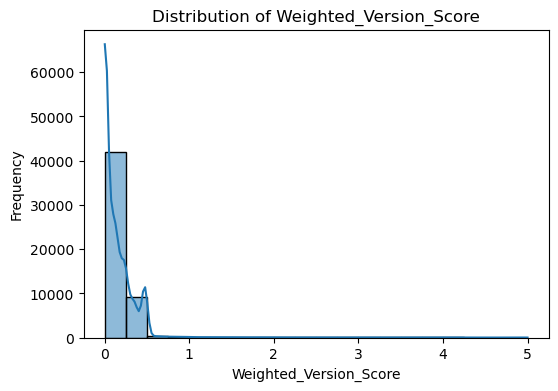

In [20]:
# Histogram of Current Version Score
plt.figure(figsize=(6, 4))
sns.histplot(app['Weighted_Version_Score'], bins=20, kde=True)
plt.xlabel('Weighted_Version_Score')
plt.ylabel('Frequency')
plt.title('Distribution of Weighted_Version_Score')
plt.show()

The weighted version score's relatively low mean and median imply that a significant portion of apps have scores below 1. This indicates a trend where many apps tend to have lower scores, while only a few apps achieve significantly higher scores. The spread of the scores shows that the distribution is not tightly concentrated around the mean but rather dispersed across a wider range of values. Moreover, the data exhibits a right-skewed distribution, indicating that there are a few apps with notably higher scores, pulling the mean towards the higher end of the scale.

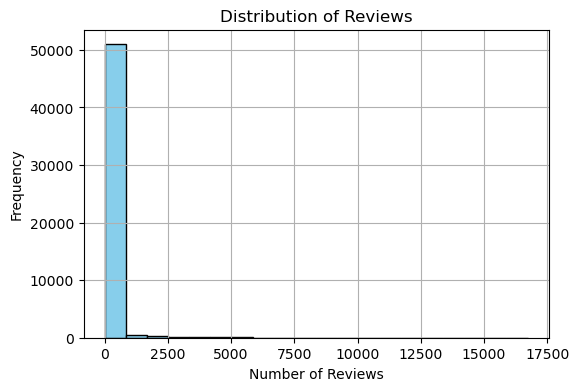

In [21]:
plt.figure(figsize=(6, 4))
plt.hist(app['Reviews'], bins=20, color='skyblue', edgecolor='black')
plt.xlabel('Number of Reviews')
plt.ylabel('Frequency')
plt.title('Distribution of Reviews')
plt.grid(True)
plt.show()

The plots confirm with our analysis showing a strong right-skewed distribution as the Weighted_Version_Score strongly depending on the number of reviews that an app has.

#### 2. Price

#### (a). Distribution of Price

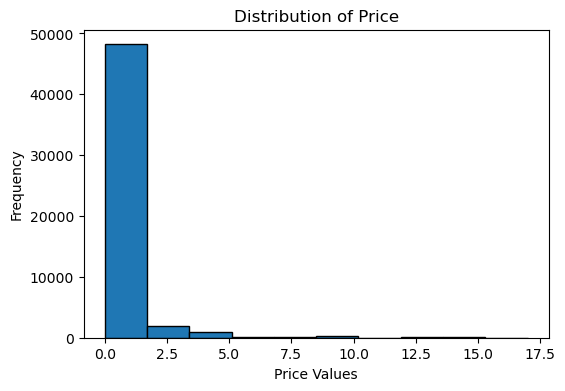

In [26]:
z_scores = standardize_column(app,'Price')
#Define a threshold for identifying outliers
threshold = 3 
data_without_outliers = app[z_scores <= threshold]

#Price distribution
plt.figure(figsize=(6, 4))
plt.hist(data_without_outliers['Price'],bins=10, edgecolor='black')
plt.title('Distribution of Price')
plt.xlabel('Price Values')
plt.ylabel('Frequency')
plt.show()

As evident from the histogram, the majority of apps are priced below $2.5, with a significant number of them being offered for free. This trend indicates that free apps tend to be more appealing to users, leading to higher download rates.

#### (b). Distribution of Weighted Version Score and Price

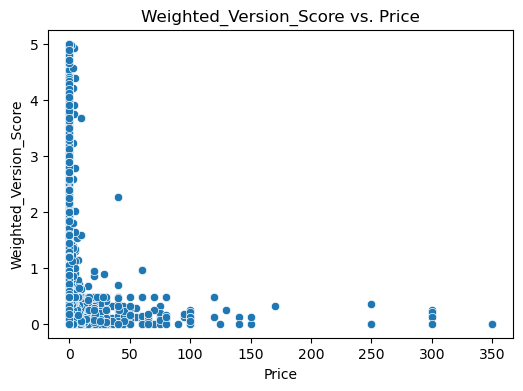

In [27]:
# Scatter plot: Current Version Score vs. Price
plt.figure(figsize=(6, 4))
sns.scatterplot(x='Price', y='Weighted_Version_Score', data=app)
plt.xlabel('Price')
plt.ylabel('Weighted_Version_Score')
plt.title('Weighted_Version_Score vs. Price')
plt.show()

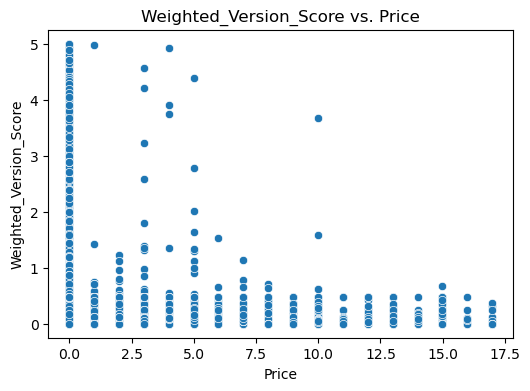

In [28]:
# Scatter plot: Current Version Score vs. Price
plt.figure(figsize=(6, 4))
sns.scatterplot(x='Price', y='Weighted_Version_Score', data=data_without_outliers)
plt.xlabel('Price')
plt.ylabel('Weighted_Version_Score')
plt.title('Weighted_Version_Score vs. Price')
plt.show()

The examination of the plot graph depicting weighted version scores against app prices reveals a notable trend: cheaper apps tend to receive higher scores, likely due to their ability to attract a larger user base and garner more ratings. However, this broader user engagement also exposes them to a greater number of low scores, affecting their overall rating. Conversely, higher-priced apps exhibit lower scores, as users' elevated expectations when paying a premium can result in more critical reviews. In conclusion, app pricing significantly influences their weighted version scores, with cheaper apps benefiting from increased user participation but facing mixed reviews, while higher-priced apps may contend with greater scrutiny and lower ratings.

#### 3.  Update_Frequency

#### (a).  Update Frequency Distribution (Histogram)

The histogram shows the distribution of `Update_Frequency` values in the dataset. It is a bar-like plot where each bar represents a range of `Update_Frequency` values, and the height of the bar indicates the frequency of apps falling within that range. The x-axis represents the range of update frequency (in days), and the y-axis represents the frequency (number of apps). This graph helps you understand the common update frequency patterns in the dataset.

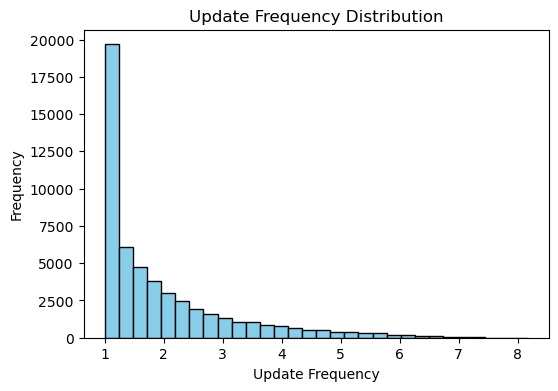

In [29]:
# Data Distribution Visualization - Histogram
plt.figure(figsize=(6, 4))
plt.hist(app['Update_Frequency'], bins=30, color='skyblue', edgecolor='black')
plt.xlabel('Update Frequency')
plt.ylabel('Frequency')
plt.title('Update Frequency Distribution')
plt.show()

**b). Update Frequency Box Plot:**

The box plot is used to visualize the distribution of `Update_Frequency` and identify potential outliers. It shows the median (the line inside the box), the interquartile range (the box), and any outliers (data points beyond the whiskers). The x-axis represents the `Update_Frequency` values in days. Outliers may appear as individual points beyond the whiskers, and they could indicate apps with unusually high or low update frequencies compared to the majority.

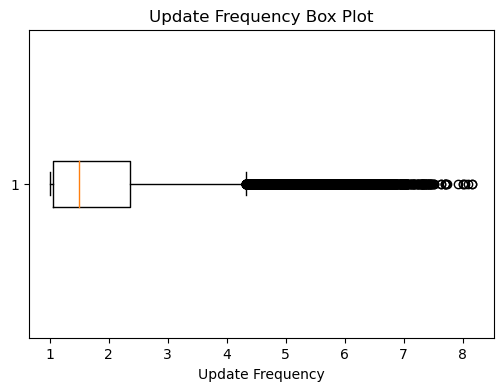

In [30]:
# Box Plot to visualize outliers
plt.figure(figsize=(6, 4))
plt.boxplot(app['Update_Frequency'], vert=False)
plt.xlabel('Update Frequency')
plt.title('Update Frequency Box Plot')
plt.show()

**c). Update Frequency vs. Weighted Version Score (Scatter Plot):**

This scatter plot shows the relationship between `Update_Frequency` and the target variable `Weighted_Version_Score`. Each point on the graph represents an app, where the x-coordinate is the `Update_Frequency` and the y-coordinate is the corresponding `Weighted_Version_Score`. The scatter plot helps you visualize any potential correlation or pattern between update frequency and the app's version score. A positive correlation might suggest that more frequent updates lead to higher version scores.

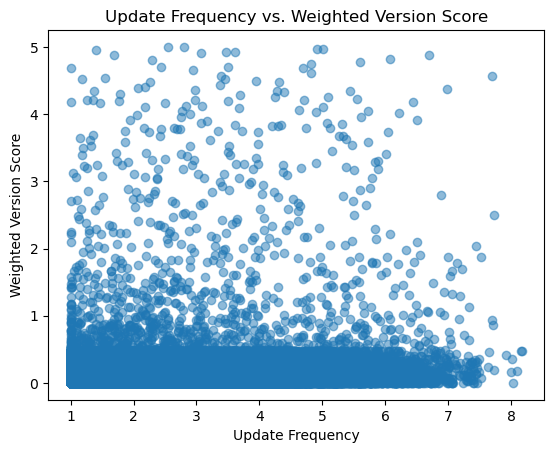

In [31]:
# Relationship with the Target Variable (Version Score)
plt.scatter(app['Update_Frequency'], app['Weighted_Version_Score'], alpha=0.5)
plt.xlabel('Update Frequency')
plt.ylabel('Weighted Version Score')
plt.title('Update Frequency vs. Weighted Version Score')
plt.show()

**d). Update Frequency by Primary Genre (Box Plot):**

If you have a categorical variable like `Primary_Genre`, this box plot shows the distribution of `Update_Frequency` across different genres. Each box represents the distribution of `Update_Frequency` for a specific genre. It allows you to compare the update frequencies of apps belonging to different genres. The x-axis represents the `Primary_Genre`, and the y-axis represents the `Update_Frequency values in days`.

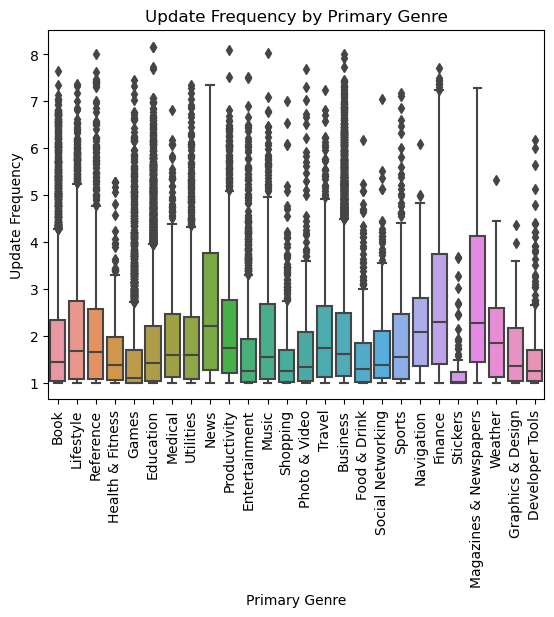

In [32]:
# Categorical Variables
sns.boxplot(x='Primary_Genre', y='Update_Frequency', data=app)
plt.xticks(rotation=90)
plt.xlabel('Primary Genre')
plt.ylabel('Update Frequency')
plt.title('Update Frequency by Primary Genre')
plt.show()

#### 4. Genre	

#### (a). Distrbution of Genre

In [34]:
app_count_per_genre = app['Primary_Genre'].value_counts()
mean_score_per_genre = app.groupby('Primary_Genre')['Weighted_Version_Score'].mean()

# Create a new DataFrame with 'counts' and 'mean_score'
genre_summary_df = pd.DataFrame({
    'counts': app_count_per_genre,
    'mean_score': mean_score_per_genre
})

# Sort the DataFrame by 'counts' in descending order
genre_summary_df = genre_summary_df.sort_values(by='counts', ascending=False)
genre_summary_df

,counts,mean_score
Primary_Genre,,
Business,14810,0.129670
Education,13203,0.145306
Book,5904,0.164560
Games,4175,0.207675
Finance,2202,0.197861
Entertainment,1841,0.186789
Productivity,1502,0.176320
Reference,1472,0.172625
Utilities,1228,0.165683


We created a new dataframe specifically for genre for better analysis. The two columns are counts (number of apps) and mean_score (average Weighted_Version_Score) of genres. 

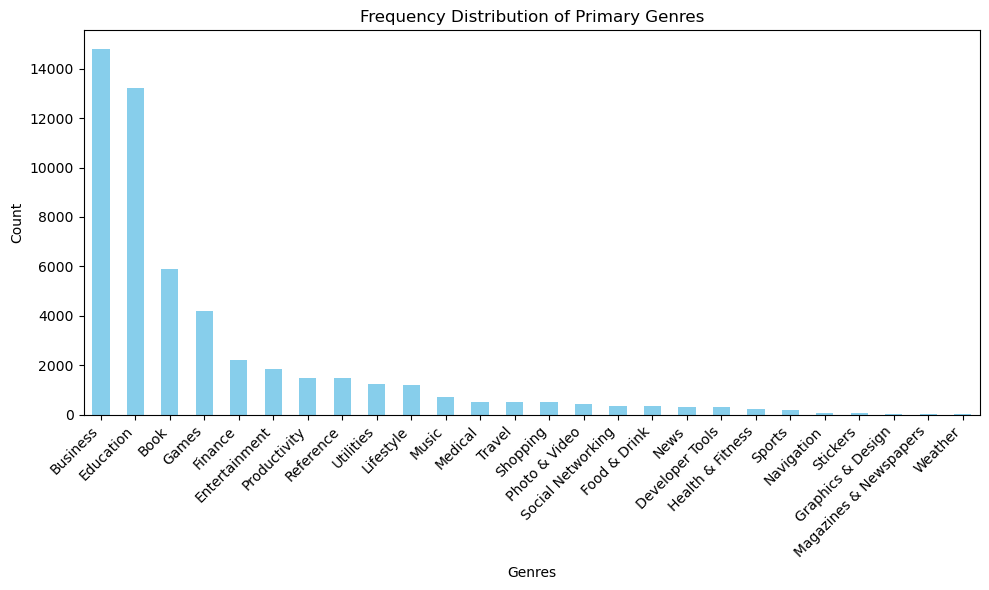

In [35]:
# Create a bar plot for counts
plt.figure(figsize=(10, 6))
genre_summary_df['counts'].plot(kind='bar', color='skyblue')
plt.xlabel('Genres')
plt.ylabel('Count')
plt.title('Frequency Distribution of Primary Genres')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

As we can see, bussiness with the most counts does not have the highest mean_score. 

#### (b). Distribution of Weighted Version Score VS Genre

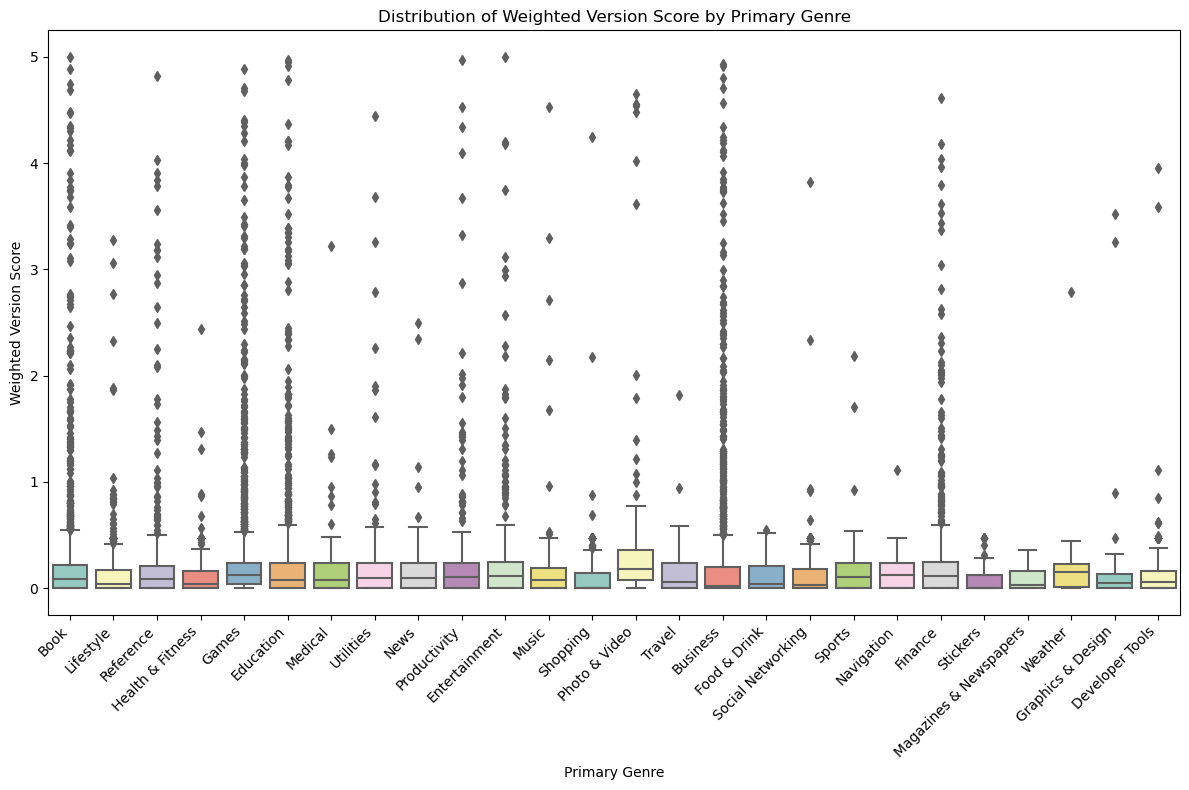

In [37]:
plt.figure(figsize=(12, 8))
sns.boxplot(x='Primary_Genre', y='Weighted_Version_Score', data=app, palette='Set3')
plt.xlabel('Primary Genre')
plt.ylabel('Weighted Version Score')
plt.title('Distribution of Weighted Version Score by Primary Genre')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Upon examining the distribution of all genres, we discovered a common pattern characterized by strong susceptibility to outliers.

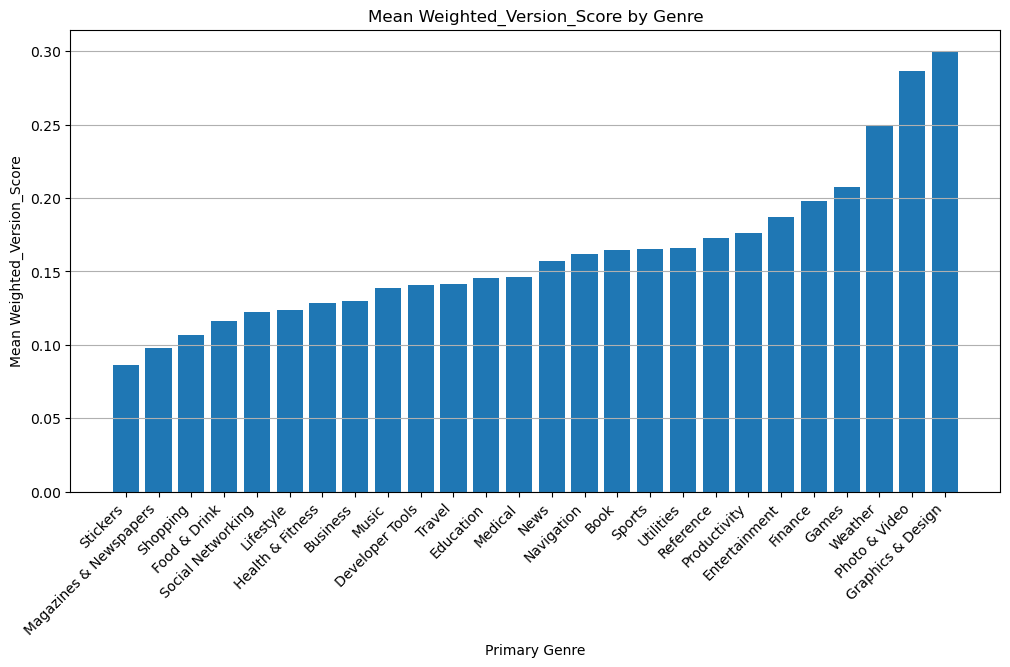

In [38]:
sorted_genre_summary_df = genre_summary_df.sort_values(by='mean_score', ascending=True)

# Bar plot
plt.figure(figsize=(12, 6))
plt.bar(sorted_genre_summary_df.index, sorted_genre_summary_df['mean_score'])
plt.xticks(rotation=90)
plt.xlabel('Primary Genre')
plt.ylabel('Mean Weighted_Version_Score')
plt.title('Mean Weighted_Version_Score by Genre')
plt.grid(axis='y')
plt.xticks(rotation=45, ha='right')
plt.show()

In [39]:
genre_summary_df.sort_values(by='mean_score', ascending=False)

,counts,mean_score
Primary_Genre,,
Graphics & Design,34,0.299679
Photo & Video,413,0.286260
Weather,22,0.248807
Games,4175,0.207675
Finance,2202,0.197861
Entertainment,1841,0.186789
Productivity,1502,0.176320
Reference,1472,0.172625
Utilities,1228,0.165683


From the bar plot, apps that are in Graphics & Design genre tends to be the most popular ones as this genre has the highest mean_score. And this dataframe is sorted by the mean_score in decreasing order.

# Data Analysis & Results

* Include cells that describe the steps in your data analysis.
* You'll likely also have some visualizations here as well.

#### Linear Regression

# Conclusion & Discussion

* Discussion of your results and how they address your experimental question(s).
* Come to a conclusion about your questions and hypothesis (remember we can only reject or fail to reject the null, we cannot accept the hypothesis. 
* What are the implications of your results?
* Discuss limitations of your analyses.
* You can also discuss future directions this work could be taken.